In [98]:
from google.colab import files
uploaded = files.upload()

Saving img33.jpg to img33.jpg


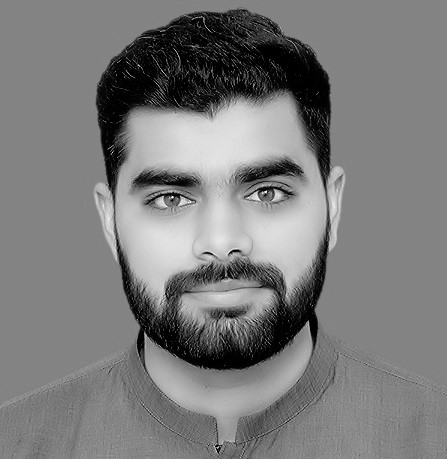

-1

In [109]:
#import the dependencies
import cv2
from google.colab.patches import cv2_imshow

import numpy as np

image = cv2.imread('img33.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(image_gray, (3,3), 0)

cv2_imshow( image_gray)
cv2.waitKey(0)

In [111]:
kernel2 = np.ones((5, 5), np.float32)/25

# Applying the filter
imgb = cv2.filter2D(src=image_gray, ddepth=-1, kernel=kernel2)


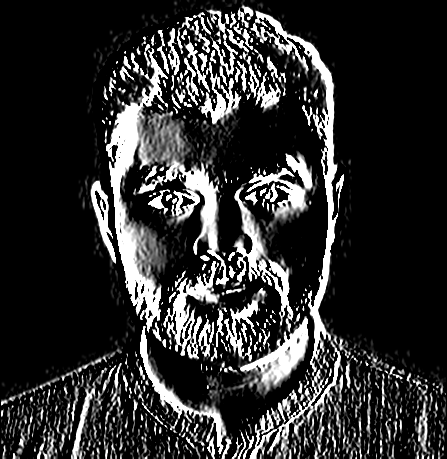

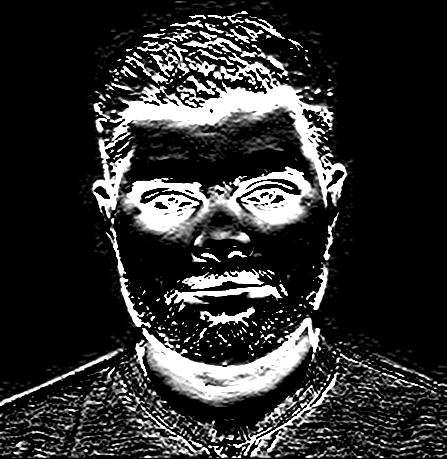

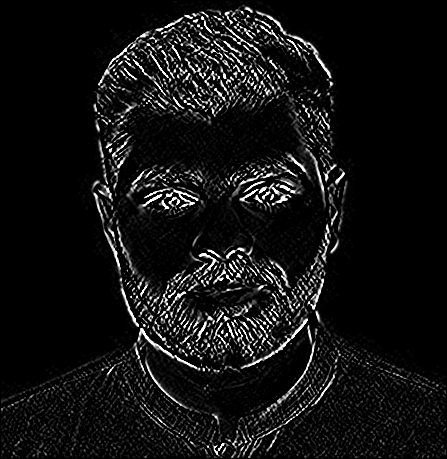

-1

In [112]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2.waitKey(0)
cv2_imshow( sobely)
cv2.waitKey(0)
cv2_imshow(sobelxy)
cv2.waitKey(0)

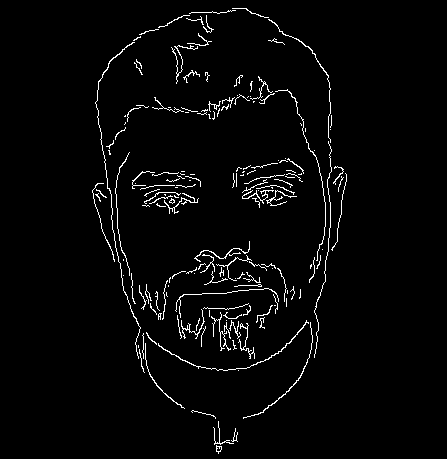

-1

In [113]:
# Canny Edge Detection with bluw
edges1 = cv2.Canny(image=imgb, threshold1=135, threshold2=40) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges1)
cv2.waitKey(0)

In [103]:
pip install --upgrade scikit-image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


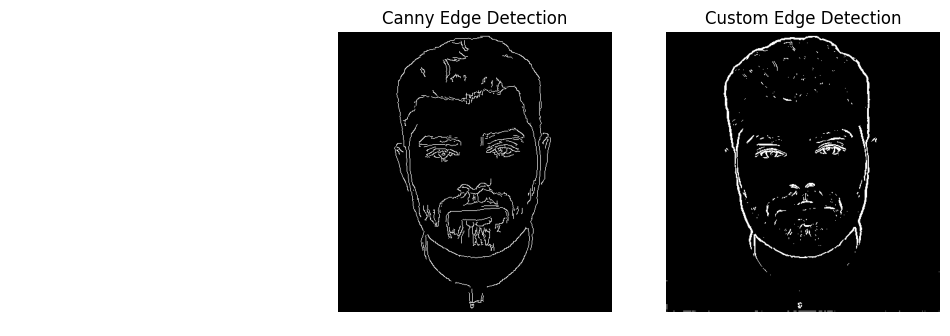

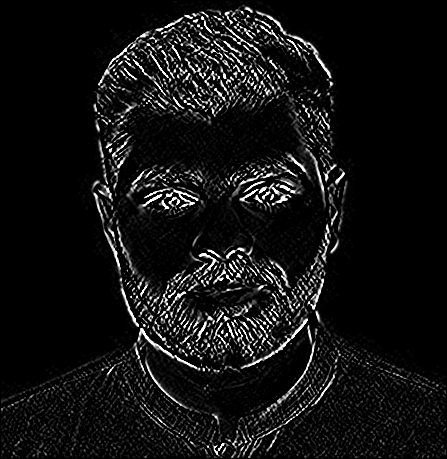

In [129]:
from scipy.ndimage import convolve

from scipy.ndimage import gaussian_laplace
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure

# Convert the image to grayscale
gray = color.rgb2gray(image)

def custom_edge_detection(img, threshold):
    height, width = img.shape
    edges = np.zeros_like(img, dtype=bool)

    for i in range(1, height-1):
        for j in range(1, width-1):
            dx = img[i, j+1] - img[i, j-1]
            dy = img[i+1, j] - img[i-1, j]

            gradient_magnitude = np.sqrt(dx**2 + dy**2)

            if gradient_magnitude > threshold:
                edges[i, j] = 1

    return edges

def custom_smoothing(image):
    kernel = np.ones((3, 3), dtype=float) / 9.0  # 3x3 averaging filter kernel

    # Use convolution for efficient smoothing
    smoothed = convolve(image, kernel, mode='constant', cval=1.0)

    return smoothed

# Apply optimized smoothing
smoothed_image = custom_smoothing(gray)


# Apply custom edge detection
edges = custom_edge_detection(smoothed_image, threshold=0.175)

# Display the original, edges, and smoothed image
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax = axes.ravel()


ax[1].imshow(edges1, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection')

ax[2].imshow(edges, cmap=plt.cm.gray)
ax[2].set_title('Custom Edge Detection')




for a in ax:
    a.axis('off')

plt.show()
cv2_imshow(sobelxy)


# Segmetation Part

(256500, 3)


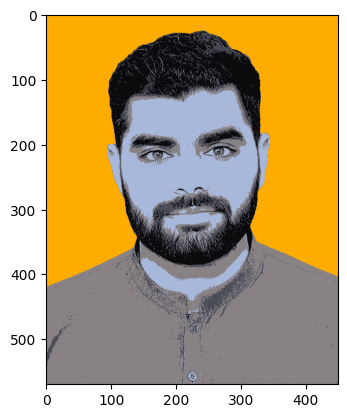

In [ ]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

print(pixel_values.shape)


# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

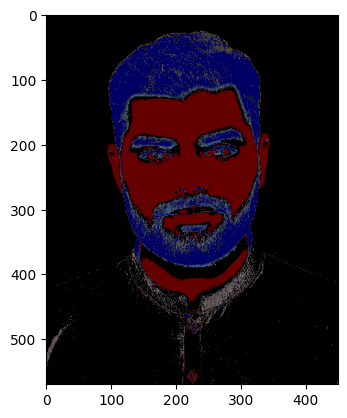

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
cluster = 0
masked_image[labels == cluster] = [100, 0, 0]
cluster = 3
masked_image[labels == cluster] = [0, 0, 0]
cluster = 4
masked_image[labels == cluster] = [0, 0, 100]

# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()